# Load Dataset 

In [272]:
import pandas as pd
import numpy as np

In [273]:
df=pd.read_csv("Titanic-Dataset.csv")

In [274]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
418,419,0,2,"Matthews, Mr. William John",male,30.0,0,0,28228,13.0000,NaN,S
358,359,1,3,"McGovern, Miss. Mary",female,NaN,0,0,330931,7.8792,NaN,Q
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
717,718,1,2,"Troutt, Miss. Edwina Celia ""Winnie""",female,27.0,0,0,34218,10.5000,E101,S
286,287,1,3,"de Mulder, Mr. Theodore",male,30.0,0,0,345774,9.5000,NaN,S


# Data Cleaning

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [276]:
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
510,511,1,3,"Daly, Mr. Eugene Patrick",male,29.0,0,0,382651,7.7500,NaN,Q
569,570,1,3,"Jonsson, Mr. Carl",male,32.0,0,0,350417,7.8542,NaN,S
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S


### Age Column

In [277]:
df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [278]:
df["Age"].fillna(df["Age"].median(),inplace=True)

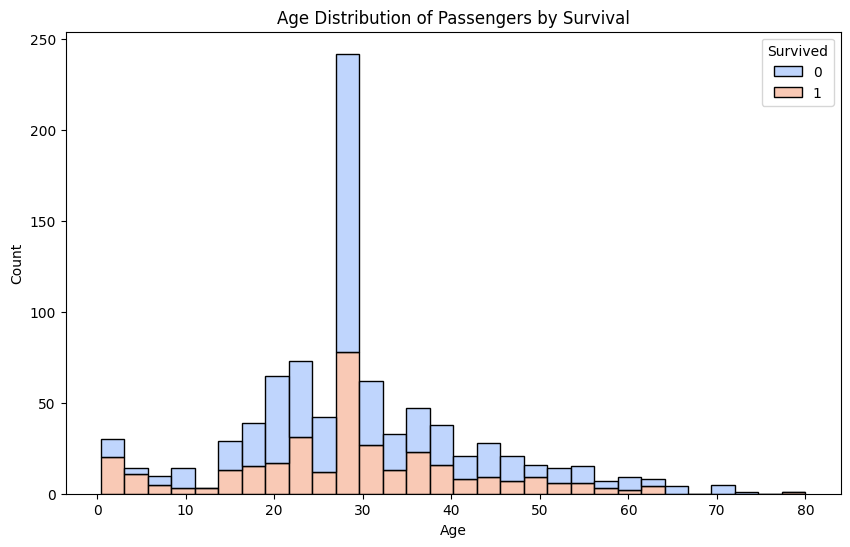

In [279]:
import seaborn as sns
import matplotlib.pyplot as plt
# Histogram using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', palette='coolwarm', kde=False)
plt.title('Age Distribution of Passengers by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [280]:
bin=[0,10,20,40,60,90]
lavel=["Child","Teen","Adult","Middle_Age","Old"]
df["Age group"]=pd.cut(df["Age"],bins=bin,labels=lavel)

In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  Age group    891 non-null    category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 84.7+ KB


In [282]:
df.drop(columns=["Age"],inplace=True)

In [283]:
df=pd.get_dummies(df,columns=["Age group"])

### Cabin column

In [284]:
df["Cabin"].isnull().sum()
# 687
#We don't have enhough data so we are delete the row
df.drop(columns=["Cabin"],inplace=True)

In [285]:
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age group_Child,Age group_Teen,Age group_Adult,Age group_Middle_Age,Age group_Old
719,720,0,3,"Johnson, Mr. Malkolm Joackim",male,0,0,347062,7.7750,S,False,False,True,False,False
29,30,0,3,"Todoroff, Mr. Lalio",male,0,0,349216,7.8958,S,False,False,True,False,False
492,493,0,1,"Molson, Mr. Harry Markland",male,0,0,113787,30.5000,S,False,False,False,True,False


### Sex and Pclass Column

In [286]:
df["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [287]:
df["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [288]:
# One-hot encode the 'Sex' column
df = pd.get_dummies(df, columns=['Sex'])

# Display the first few rows of the modified dataset
print(df.head())


   PassengerId  Survived  Pclass   
0            1         0       3  \
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  SibSp  Parch   
0                            Braund, Mr. Owen Harris      1      0  \
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      1      0   
2                             Heikkinen, Miss. Laina      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      1      0   
4                           Allen, Mr. William Henry      0      0   

             Ticket     Fare Embarked  Age group_Child  Age group_Teen   
0         A/5 21171   7.2500        S            False           False  \
1          PC 17599  71.2833        C            False           False   
2  STON/O2. 3101282   7.9250        S            False           False   
3            113803  53.1000        S            False           F

### Embarked Column

In [289]:
df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [290]:
df["Class"]=df["Embarked"].map({'C':1,'Q':2,'S':3})

In [291]:
df['Class'].sample(2)
"""Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)"""

'Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)'

### SipSp And Parch Column

In [292]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,SibSp,Parch,Ticket,Fare,Embarked,Age group_Child,Age group_Teen,Age group_Adult,Age group_Middle_Age,Age group_Old,Sex_female,Sex_male,Class
790,791,0,3,"Keane, Mr. Andrew ""Andy""",0,0,12460,7.7500,Q,False,False,True,False,False,False,True,2.0
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",4,2,347082,31.2750,S,False,True,False,False,False,True,False,3.0
500,501,0,3,"Calic, Mr. Petar",0,0,315086,8.6625,S,False,True,False,False,False,False,True,3.0
219,220,0,2,"Harris, Mr. Walter",0,0,W/C 14208,10.5000,S,False,False,True,False,False,False,True,3.0
830,831,1,3,"Yasbeck, Mrs. Antoni (Selini Alexander)",1,0,2659,14.4542,C,False,True,False,False,False,True,False,1.0


In [293]:
df["SibSp"].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [294]:
df["Parch"].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [295]:
df["Family_member"]=df["Parch"]+df["SibSp"]

In [296]:
df.sample()

,PassengerId,Survived,Pclass,Name,SibSp,Parch,Ticket,Fare,Embarked,Age group_Child,Age group_Teen,Age group_Adult,Age group_Middle_Age,Age group_Old,Sex_female,Sex_male,Class,Family_member
55,56,1,1,"Woolner, Mr. Hugh",0,0,19947,35.5,S,False,False,True,False,False,False,True,3.0,0


In [297]:
df.drop(columns=["Parch","SibSp"],inplace=True)

In [298]:
df.drop(columns=["Embarked"],inplace=True)

### Fare Column

C:\Users\Debasish Das\AppData\Local\Temp\ipykernel_844\2879774509.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x='Fare', multiple='stack', palette='coolwarm', kde=False)


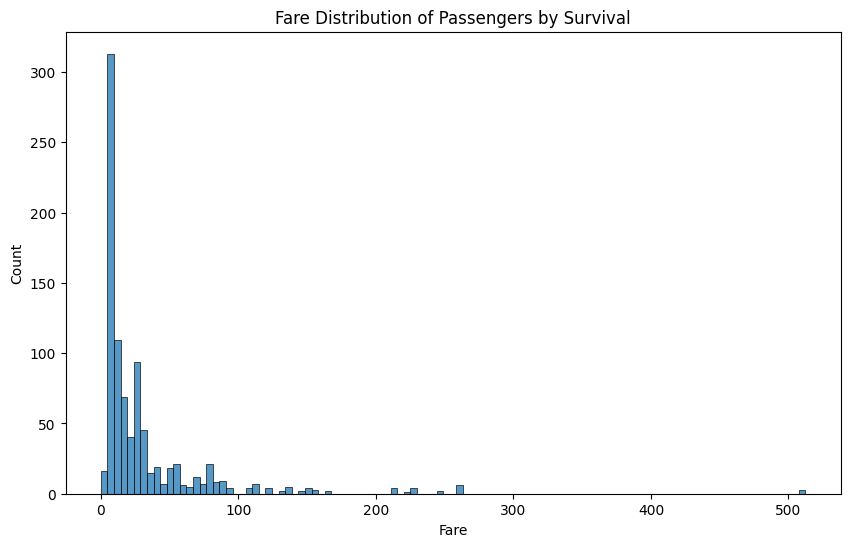

In [299]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Fare', multiple='stack', palette='coolwarm', kde=False)
plt.title('Fare Distribution of Passengers by Survival')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

C:\Users\Debasish Das\AppData\Local\Temp\ipykernel_844\1450544794.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=df, y='Fare', palette='coolwarm')


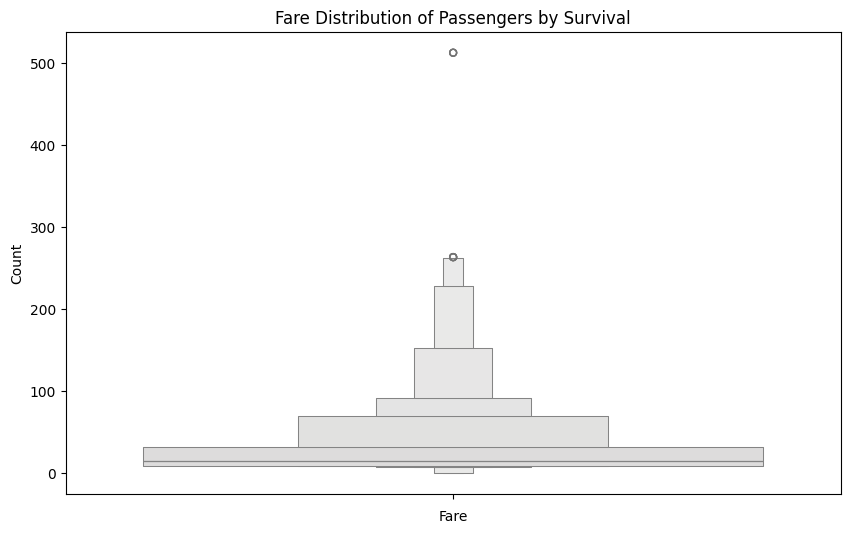

In [300]:
plt.figure(figsize=(10, 6))
sns.boxenplot(data=df, y='Fare', palette='coolwarm')
plt.title('Fare Distribution of Passengers by Survival')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

In [301]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Ticket,Fare,Age group_Child,Age group_Teen,Age group_Adult,Age group_Middle_Age,Age group_Old,Sex_female,Sex_male,Class,Family_member
659,660,0,1,"Newell, Mr. Arthur Webster",35273,113.2750,False,False,False,True,False,False,True,1.0,2
715,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",348124,7.6500,False,True,False,False,False,False,True,3.0,0
314,315,0,2,"Hart, Mr. Benjamin",F.C.C. 13529,26.2500,False,False,False,True,False,False,True,3.0,2
572,573,1,1,"Flynn, Mr. John Irwin (""Irving"")",PC 17474,26.3875,False,False,True,False,False,False,True,3.0,0
799,800,0,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",345773,24.1500,False,False,True,False,False,True,False,3.0,2


### Name Column

In [302]:
df["Title"] = df["Name"].apply(lambda x: x.split(",")[1].split(".")[0].strip())

In [303]:
df["Title"].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [304]:
df["Title"].replace(["Dr","Col","Rev","Ms","Dona","Major",
"Mlle",
"Don",
"Mme",
"Lady",
"Sir",
"Capt",
"the Countess",
"Jonkheer"],"Other",inplace=True)
df["Title"].value_counts()

Title
Mr        517
Miss      182
Mrs       125
Master     40
Other      27
Name: count, dtype: int64

In [305]:
df.drop(columns=["Name"],inplace=True)

### Other Column 

In [306]:
df.drop(columns=["PassengerId","Ticket"],inplace=True)

In [307]:
df

,Survived,Pclass,Fare,Age group_Child,Age group_Teen,Age group_Adult,Age group_Middle_Age,Age group_Old,Sex_female,Sex_male,Class,Family_member,Title
0,0,3,7.2500,False,False,True,False,False,False,True,3.0,1,Mr
1,1,1,71.2833,False,False,True,False,False,True,False,1.0,1,Mrs
2,1,3,7.9250,False,False,True,False,False,True,False,3.0,0,Miss
3,1,1,53.1000,False,False,True,False,False,True,False,3.0,1,Mrs
4,0,3,8.0500,False,False,True,False,False,False,True,3.0,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,13.0000,False,False,True,False,False,False,True,3.0,0,Other
887,1,1,30.0000,False,True,False,False,False,True,False,3.0,0,Miss
888,0,3,23.4500,False,False,True,False,False,True,False,3.0,3,Miss
889,1,1,30.0000,False,False,True,False,False,False,True,1.0,0,Mr


In [308]:
df['Class'].fillna(-1, inplace=True)

In [309]:
df.describe()

,Survived,Pclass,Fare,Class,Family_member
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,32.204208,2.527497,0.904602
std,0.486592,0.836071,49.693429,0.808714,1.613459
min,0.000000,1.000000,0.000000,-1.000000,0.000000
25%,0.000000,2.000000,7.910400,2.000000,0.000000
50%,0.000000,3.000000,14.454200,3.000000,0.000000
75%,1.000000,3.000000,31.000000,3.000000,1.000000
max,1.000000,3.000000,512.329200,3.000000,10.000000


In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Survived              891 non-null    int64  
 1   Pclass                891 non-null    int64  
 2   Fare                  891 non-null    float64
 3   Age group_Child       891 non-null    bool   
 4   Age group_Teen        891 non-null    bool   
 5   Age group_Adult       891 non-null    bool   
 6   Age group_Middle_Age  891 non-null    bool   
 7   Age group_Old         891 non-null    bool   
 8   Sex_female            891 non-null    bool   
 9   Sex_male              891 non-null    bool   
 10  Class                 891 non-null    float64
 11  Family_member         891 non-null    int64  
 12  Title                 891 non-null    object 
dtypes: bool(7), float64(2), int64(3), object(1)
memory usage: 48.0+ KB


# Model Building

In [311]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [312]:
# Add FamilySize column to the DataFrame
"df['FamilySize'] = df['SibSp'].astype(int) + df['Parch'].astype(int) + 1"


"df['FamilySize'] = df['SibSp'].astype(int) + df['Parch'].astype(int) + 1"

In [313]:
"""import re
# Define function to extract titles from passenger names
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""
# Create a new feature Title, containing the titles of passenger names
for dataset in df:
    dataset['Title'] = dataset['Name'].apply(get_title)
# Group all non-common titles into one single grouping "Rare"
for dataset in df:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 
                                                 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')"""

'import re\n# Define function to extract titles from passenger names\ndef get_title(name):\n    title_search = re.search(\' ([A-Za-z]+)\\.\', name)\n    # If the title exists, extract and return it.\n    if title_search:\n        return title_search.group(1)\n    return ""\n# Create a new feature Title, containing the titles of passenger names\nfor dataset in df:\n    dataset[\'Title\'] = dataset[\'Name\'].apply(get_title)\n# Group all non-common titles into one single grouping "Rare"\nfor dataset in df:\n    dataset[\'Title\'] = dataset[\'Title\'].replace([\'Lady\', \'Countess\',\'Capt\', \'Col\',\'Don\', \n                                                 \'Dr\', \'Major\', \'Rev\', \'Sir\', \'Jonkheer\', \'Dona\'], \'Rare\')\ndataset[\'Title\'] = dataset[\'Title\'].replace(\'Mlle\', \'Miss\')\ndataset[\'Title\'] = dataset[\'Title\'].replace(\'Ms\', \'Miss\')\ndataset[\'Title\'] = dataset[\'Title\'].replace(\'Mme\', \'Mrs\')'

In [314]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# Fit and transform the Title column
df['Title'] = label_encoder.fit_transform(df['Title'])

In [315]:
x=df.drop(columns=["Survived"])
y=df['Survived']

In [316]:
x

,Pclass,Fare,Age group_Child,Age group_Teen,Age group_Adult,Age group_Middle_Age,Age group_Old,Sex_female,Sex_male,Class,Family_member,Title
0,3,7.2500,False,False,True,False,False,False,True,3.0,1,2
1,1,71.2833,False,False,True,False,False,True,False,1.0,1,3
2,3,7.9250,False,False,True,False,False,True,False,3.0,0,1
3,1,53.1000,False,False,True,False,False,True,False,3.0,1,3
4,3,8.0500,False,False,True,False,False,False,True,3.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,13.0000,False,False,True,False,False,False,True,3.0,0,4
887,1,30.0000,False,True,False,False,False,True,False,3.0,0,1
888,3,23.4500,False,False,True,False,False,True,False,3.0,3,1
889,1,30.0000,False,False,True,False,False,False,True,1.0,0,2


In [317]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [318]:
model=LogisticRegression()
model.fit(x_train,y_train)

C:\Users\Debasish Das\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [319]:
y_pred=model.predict(x_test)
result=accuracy_score(y_test,y_pred)
print(result)

0.7932960893854749


In [320]:
model=GradientBoostingClassifier()
model.fit(x_train,y_train)


GradientBoostingClassifier()

In [321]:
y_pred=model.predict(x_test)
result=accuracy_score(y_test,y_pred)
print(result)

0.8100558659217877


In [322]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [323]:
y_pred=model.predict(x_test)
result=accuracy_score(y_test,y_pred)


In [324]:
result

0.8268156424581006

In [327]:
import pickle
# Save the model
with open("Random.pkl","wb") as file:
    pickle.dump(model,file)
